In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [5]:
df = pd.read_csv("../data/worldcities.csv")
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [18]:
dic = {}
for name_obj in df.city_ascii:
    name = str(name_obj) + "\n"
    for i in range(len(name) - 1):
        couple = name[i:i+2]
        if couple in dic:
            dic[couple] += 1
        else:
            dic[couple] = 1

In [36]:
with open('cities_names_dict.pkl', 'wb') as f:
    pickle.dump(dic, f)

# Scores of real names

Text(0.5, 1.0, 'Score distribution. Min: 42 Q5: 473 Q10: 606')

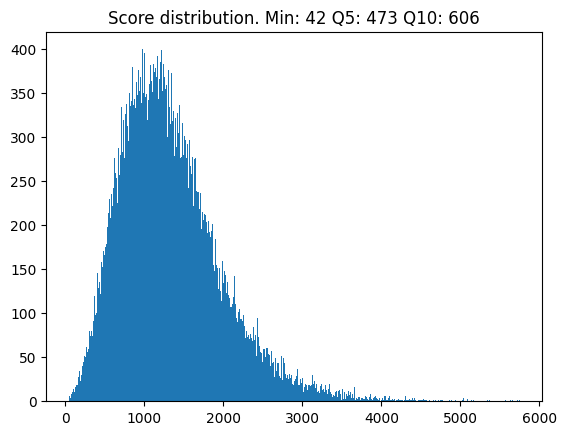

In [37]:
scores = np.empty(len(df.city_ascii), dtype="float")
counter = 0
for name_obj in df.city_ascii:
    name = str(name_obj) + "\n"
    score = 1
    l = len(name) - 1
    p = 1.0 / l
    for i in range(l):
        couple = name[i:i+2]
        if couple not in dic.keys():
            continue

        score *= np.power(dic[couple], p)

    scores[counter] = score
    counter += 1

plt.hist(scores, bins=512)

q0 = int(np.min(scores))
q5 = int(np.quantile(scores, 0.05))
q10 = int(np.quantile(scores, 0.1))
plt.title(f"Score distribution. Min: {q0} Q5: {q5} Q10: {q10}")

# Scores of shuffled names

Text(0.5, 1.0, 'Score distribution. Q75: 357 Q95: 761 Max: 5725')

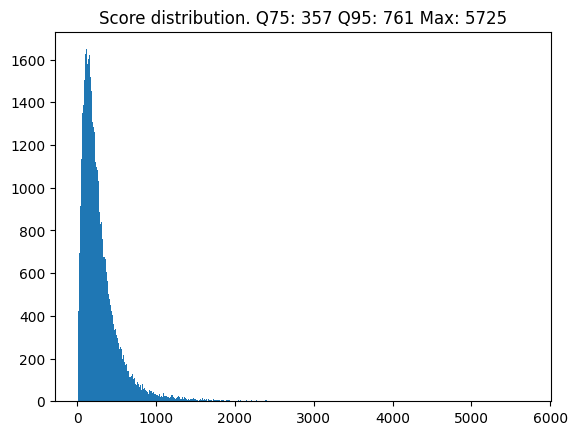

In [43]:
scores = np.empty(len(df.city_ascii), dtype="float")
counter = 0
for name_obj in df.city_ascii:
    name = ''.join(random.sample(str(name_obj), len(str(name_obj)))) + "\n"
    score = 1
    l = len(name) - 1
    p = 1.0 / l
    for i in range(l):
        couple = name[i:i+2]
        if couple not in dic.keys():
            continue

        score *= np.power(dic[couple], p)

    scores[counter] = score
    counter += 1

plt.hist(scores, bins=512)

q100 = int(np.max(scores))
q95 = int(np.quantile(scores, 0.95))
q75 = int(np.quantile(scores, 0.75))
plt.title(f"Score distribution. Q75: {q75} Q95: {q95} Max: {q100}")